<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center>Computational Mathematics, year 2, semester 1</center>
<center>Lecturer: Lucas Gerin <a href="mailto:lucas.gerin@polytechnique.edu">(send mail)</a></center>

# Graphs and Matrices 3: Test

## Table of contents

- [Exercise 1: Letters $a$ come by two or three](#isolated)
- [Exercise 2: A coin game](#frog)
- [Exercise 3: Distinct colors](#color)
- [Exercise 4: Paths in a graph](#RW)



In [2]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("../style/custom2.css").read()
    return HTML(styles)
css_styling()


In [3]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)
import sympy as sympy             # package for symbolic computation
from sympy import *


<!--<div markdown=1 class="Rmk"> Here is the Latex code of a matrix that you can copy/paste throughout the notebook:
$$
M=
\begin{matrix}
v_1 \\ v_2 \\ v_3 
\end{matrix}
\begin{pmatrix}
1 & 1 & 0\\
0 & 0 & 1\\
0 & 1 & 0\\
\end{pmatrix}.
$$-->


<div markdown=1 class=Abstract>

# Please read!

#### Guidelines for graded notebooks

* This notebook is graded, you must submit your work (only the .pynb file) on the moodle at the end of the session.
* Submission is due at 5:35 pm. No late submission is permitted.
* The work is **individual**, you are not allowed to communicate with other students. Copy/pasting has been very severely punished in previous years.
* You are allowed to access previous notebooks and the lecture notes (and any online documentation on numpy, python,...).
* The four exercises are independent. You can of course solve the exercices in any order.
* **Each function or script must be tested** (for your sake, it also must be commented).
* Mathematical explanations have to be given in the corresponding "Answer" cell (not as comments of the code). Try to be rigorous and concise.
* Here is a sample of a matrix in LateX that you can copy/paste if needed:
$$
A=
\begin{matrix}
 u \\ v \\ w 
\end{matrix}
\begin{pmatrix}
0 & 1 & 0  \\
0 & 0 & 0\\
0 &  1 & 1\\
\end{pmatrix}.
$$


Here is a sample of a code to define a matrix in numpy and raise it to some power:

In [4]:
TransitionMatrix=np.zeros([3,3])
for k in range(3):
    TransitionMatrix[k,k]=1/2
    TransitionMatrix[k,(k+1)%3]=1/2
print('A transition matrix M:')
print(TransitionMatrix)
print('M**4 =')
print(np.linalg.matrix_power(TransitionMatrix,4))
print('not to be confused with:')
print(TransitionMatrix**4)

A transition matrix M:
[[0.5 0.5 0. ]
 [0.  0.5 0.5]
 [0.5 0.  0.5]]
M**4 =
[[0.3125 0.3125 0.375 ]
 [0.375  0.3125 0.3125]
 [0.3125 0.375  0.3125]]
not to be confused with:
[[0.0625 0.0625 0.    ]
 [0.     0.0625 0.0625]
 [0.0625 0.     0.0625]]


<a id='isolated'></a>
## Exercise 1. Letters $a$ come by two or three

<div markdown=1 class="DoIt"> 

We consider words $w$ with letters $a,b$. We say that $w$ is <i>proper</i> if every run of consecutive $a$'s has length $2$ or $3$. For instance
$$
w_1=b\color{green}{aa}b\color{green}{aaa}bbbbbb\color{green}{aa}b
$$
is proper while
$$
w_2=\color{green}{aa}b\color{green}{aaa}b\color{red}{a}bbbbb\color{green}{aa}b\color{red}{aaaaa}
$$
is not.
Let $I_n$ be the number of proper words with $n$ letters.

Compute $I_{20}$ using a graph and its adjacency matrix. Explain carefully which graph and which coefficients of the matrix you consider.

<i>(To check your result: I find $I_{10}=104$.)</i>


<div markdown=1 class="Answers"> 
Your answer here.


In [9]:
# states (by last char): b , 1st a , 2nd a, 3rd a
# we normalize empty state to b, bc it does not change anything

init_state = np.zeros(4)
init_state[0] = 1

G = np.zeros([4,4])

G[0][0] = 1
G[0][1] = 1
G[1][2] = 1
G[2][3] = 1
G[2][0] = G[3][0] = 1

I = dict()
I[10] = init_state @ np.linalg.matrix_power(G , 10)
I[20] = init_state @ np.linalg.matrix_power(G , 20)

I[10] = I[10][0] + I[10][2] + I[10][3]
I[20] = I[20][0] + I[20][2] + I[20][3]

print(I[10] , I[20])


104.0 12816.0


<a id="frog"></a>
## Exercise 2: A coin game


A player is playing the following game of chance. She starts with an initial fortune of $0$, and at each step, she rolls a fair $6$-sided die. If the die lands on $6$, she loses. Otherwise, she adds the number to her fortune, and she continues. If her fortune reaches $10$ (or more) without rolling a $6$, she has won the game.

Here are two sample games:
\begin{align*}
&0 \stackrel{\text{die lands on }3}{\longrightarrow} 3 \stackrel{\text{die lands on }4}{\longrightarrow} 7
\stackrel{\text{die lands on }6}{\longrightarrow} \text{Lost}.\\
&0 \stackrel{\text{die lands on }5}{\longrightarrow} 5 \stackrel{\text{die lands on }2}{\longrightarrow} 7
\stackrel{\text{die lands on }1}{\longrightarrow} 8 \stackrel{\text{die lands on }4}{\longrightarrow} \text{Won}.
\end{align*}
Let also $T\in{1,2,3,\dots,10}$ be the random variable given by the number of rolls in a sample of the game. In the example above, $T=3$ and $T=4$ respectively.

<div markdown=1 class="DoIt"> 

1. Compute the probability $p$ that the player wins the game. (You can design a Markov chain on the set $\{0,1,2,\dots, 9,\text{Won},\text{Lost}\}$.)<br>
<i>(To check your code: you must find something very close to $1/2$.)</i>
2. Compute  $\mathbb{P}(T\leq 4)$. (Explain your strategy.)

<div markdown=1 class="Answers"> 

**Question 1.**<br>
<br>
<br>
**Question 2.** 

In [ ]:
# Your code here

<a id='color'></a>
## Exercise 3. Distinct colors.

<div markdown=1 class="DoIt"> 


A urn contains seven balls, one of each color: Black, White, Red, Green, Blue, Yellow, Purple. At times $1,2,3,\dots$ a ball is drawn uniformly at random and put back into the urn.

<b>Question 1</b>. Let $E_n$ be the event
$$
\{\text{ At least $4$ distinct colors have been seen at time }n\ \}.
$$
Of course $\mathbb{P}(E_1)=\mathbb{P}(E_2)=\mathbb{P}(E_3)=0$. You can check that $\mathbb{P}(E_4)=0.34985...$

Write a function which computes $\mathbb{P}(E_n)$ (explain carefully your method). Plot $n\mapsto \mathbb{P}(E_n)$.

<i>(Hint: you can consider a Markov chain on the set $\{0\text{ color}$, $1\text{ color already seen}$, $2\text{ colors already seen}$, $3\text{ colors already seen}$, $4\text{ colors or more already seen}\}$.)</i>

<b>Question 2</b>. Find the minimal $n$ such that $E_n$ occurs with more than $99\%$ chance.


<div markdown=1 class="Answers"> 

**Question 1.**<br>
<br>
<br>
**Question 2.** 

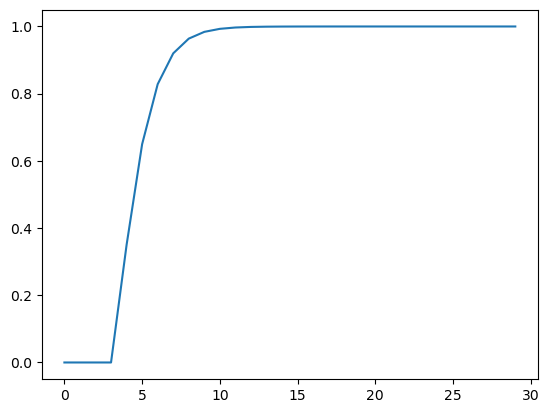

In [12]:
# Your code here

#Q1
# we take the markov chain proposed in the statement
# for i < 4 if we've seen exactly i colors, then at the next extraction, we see a new color with proba (7-i)/7

init = np.zeros(5)
init[0] = 1
G = np.zeros([5,5])

for i in range (4):
    G[i][i+1] = (7-i)/7
    G[i][i] = i/7

G[4][4] = 1 # once we see 4 colors we are done

@np.vectorize
def PE (n):
    return (init @ np.linalg.matrix_power(G , n))[4]

plt.plot(range(30) , PE(range(30)))
plt.show()

<a id='RW'></a>

## Exercise 4: Paths in a windmill

For $n\geq 1$, we define the <i>$n$-bladed windmill</i> as the graph with vertex set $\{v_0,v_1,\dots,v_{2n}\}$ in which:
* $v_0$ is connected through an edge to every other vertex;
* for every even $1\leq i\leq 2n$, the vertex $v_i$ is connected to $v_0$ and $v_{i-1}$;
* for every odd $1\leq i\leq 2n$, the vertex $v_i$ is connected to $v_0$ and $v_{i+1}$.


Here is a picture of the $n$-bladed windmill for $n=6$:
<img src="figures/Windmill.jpg" style="width: 450px;"/>


<div markdown=1 class="DoIt"> 

For $n=50$, compute the number of paths starting at $v_0$ and ending at $v_0$ of length $10$ in the $n$-bladed windmill. Explain clearly the strategy.<br>
<i>(For $n=5$ you should find $215710$ paths of length $10$.)</i>

<div markdown=1 class="Answers"> 

Explain here your strategy.


In [14]:
n = 50

G = np.zeros([2*n+1,2*n+1])

for i in range (1,2*n+1):
    G[0][i] = G[i][0] = 1

for i in range (2 , 2*n+1 , 2):
    G[i-1][i] = G[i][i-1] = 1

print(np.linalg.matrix_power(G , 10)[0][0])




11015070100.0


<div markdown=1 class="DoIt"> 

We also fix $n=50$. Let $a_k$ be the number of paths of length $k$ in the $n$-bladed windmill, starting from $v_0$. Prove that there exist two constant $c,C>1$ such that 
$$
c^k \leq a_k \leq C^k.
$$

<div markdown=1 class="Answers"> 

